In [1]:
import pandas as pd

pd.read_csv("../data/text/report.txt", sep='\t')

,기간,구분,스트레스 인지율,스트레스 인지율.1,스트레스 인지율.2,우울감 경험률,우울감 경험률.1,우울감 경험률.2,자살 생각률,자살 생각률.1,자살 생각률.2
0,기간,구분,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2019,구분,41.6,34,49.7,29.5,24.5,34.8,14.2,10.8,17.9


In [2]:
pd.read_csv("../data/text/report.txt", sep='\t', header=1)

,기간,구분,전체,남학생,여학생,전체.1,남학생.1,여학생.1,전체.2,남학생.2,여학생.2
0,2019,구분,41.6,34,49.7,29.5,24.5,34.8,14.2,10.8,17.9


In [3]:
col_names = ['연도', '비교', '스트레스', '스트레스 남학생', '스트레스 여학생', '우울감 경험율', '우울 남학생', '우울 여학생', '안좋은 생각율', '안좋은 생각 남학생', '안좋은 생각 여학생']
pd.read_csv("../data/text/report.txt", sep='\t', names=col_names, header=1)

,연도,비교,스트레스,스트레스 남학생,스트레스 여학생,우울감 경험율,우울 남학생,우울 여학생,안좋은 생각율,안좋은 생각 남학생,안좋은 생각 여학생
0,2019,구분,41.6,34,49.7,29.5,24.5,34.8,14.2,10.8,17.9


In [4]:
raw_data = pd.read_csv("../data/text/report.txt", sep='\t', names=col_names, header=1)
raw_data

,연도,비교,스트레스,스트레스 남학생,스트레스 여학생,우울감 경험율,우울 남학생,우울 여학생,안좋은 생각율,안좋은 생각 남학생,안좋은 생각 여학생
0,2019,구분,41.6,34,49.7,29.5,24.5,34.8,14.2,10.8,17.9


In [5]:
raw_data = raw_data.drop('연도', axis=1)
raw_data = raw_data.drop('비교', axis=1)
raw_data

,스트레스,스트레스 남학생,스트레스 여학생,우울감 경험율,우울 남학생,우울 여학생,안좋은 생각율,안좋은 생각 남학생,안좋은 생각 여학생
0,41.6,34,49.7,29.5,24.5,34.8,14.2,10.8,17.9


In [6]:
raw_data.loc[1] = 100. - raw_data.loc[0]
raw_data

,스트레스,스트레스 남학생,스트레스 여학생,우울감 경험율,우울 남학생,우울 여학생,안좋은 생각율,안좋은 생각 남학생,안좋은 생각 여학생
0,41.6,34.0,49.7,29.5,24.5,34.8,14.2,10.8,17.9
1,58.4,66.0,50.3,70.5,75.5,65.2,85.8,89.2,82.1


In [7]:
raw_data['응답'] = ['그렇다', '아니다']
raw_data

,스트레스,스트레스 남학생,스트레스 여학생,우울감 경험율,우울 남학생,우울 여학생,안좋은 생각율,안좋은 생각 남학생,안좋은 생각 여학생,응답
0,41.6,34.0,49.7,29.5,24.5,34.8,14.2,10.8,17.9,그렇다
1,58.4,66.0,50.3,70.5,75.5,65.2,85.8,89.2,82.1,아니다


In [8]:
raw_data.set_index('응답', drop=True, inplace=True)
raw_data

,스트레스,스트레스 남학생,스트레스 여학생,우울감 경험율,우울 남학생,우울 여학생,안좋은 생각율,안좋은 생각 남학생,안좋은 생각 여학생
응답,,,,,,,,,
그렇다,41.6,34.0,49.7,29.5,24.5,34.8,14.2,10.8,17.9
아니다,58.4,66.0,50.3,70.5,75.5,65.2,85.8,89.2,82.1


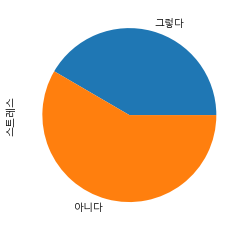

In [9]:
%matplotlib inline
from matplotlib import font_manager, rc
f_path = "c:/windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

raw_data['스트레스'].plot.pie()

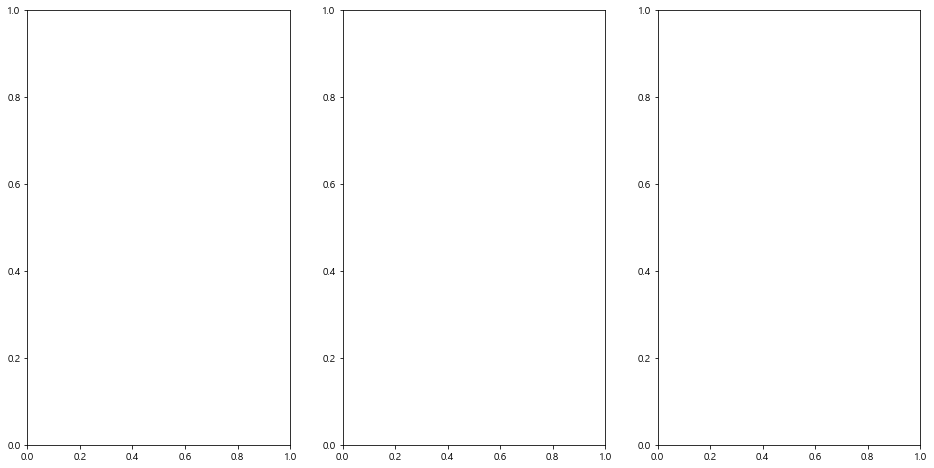

In [10]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 3, figsize=(16, 8))

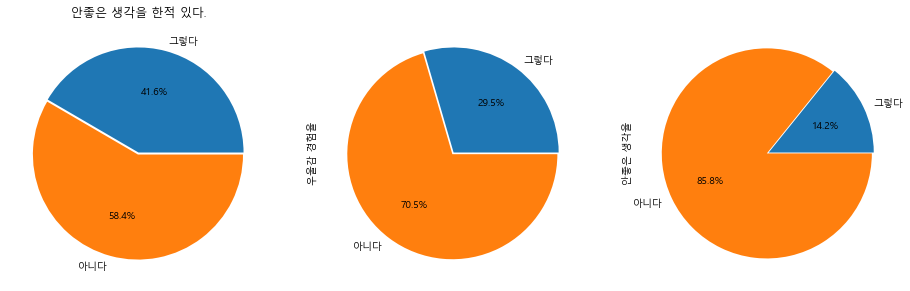

In [11]:
f, ax = plt.subplots(1, 3, figsize=(16, 8))
raw_data['스트레스'].plot.pie(explode=[0, 0.02], ax=ax[0], autopct="%1.1f%%")
ax[0].set_title('스트레스를 받은적 있다.')
ax[0].set_ylabel('')

raw_data['우울감 경험율'].plot.pie(explode=[0, 0.02], ax=ax[1], autopct="%1.1f%%")
ax[0].set_title('우울증을 경험한적 있다.')
ax[0].set_ylabel('')

raw_data['안좋은 생각율'].plot.pie(explode=[0, 0.02], ax=ax[2], autopct="%1.1f%%")
ax[0].set_title('안좋은 생각을 한적 있다.')
ax[0].set_ylabel('')

plt.show()